In [1]:
import pandas as pd
import numpy as np
import datetime
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import dask.dataframe as dd
from dask.multiprocessing import get
import numpy as np
import librosa
from scipy import signal
from scipy.io import wavfile
from scipy.signal import butter,filtfilt
from scipy.stats import kurtosis
import scipy.signal as signal
from scipy.integrate import simps


In [2]:
df = pd.read_csv('all_clubed.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'uuid', 'datetime', 'cough_detected', 'latitude',
       'longitude', 'age', 'gender', 'respiratory_condition',
       'fever_muscle_pain', 'status', 'quality_1', 'cough_type_1', 'dyspnea_1',
       'wheezing_1', 'stridor_1', 'choking_1', 'congestion_1', 'nothing_1',
       'diagnosis_1', 'severity_1', 'quality_2', 'cough_type_2', 'dyspnea_2',
       'wheezing_2', 'stridor_2', 'choking_2', 'congestion_2', 'nothing_2',
       'diagnosis_2', 'severity_2', 'quality_3', 'dyspnea_3', 'wheezing_3',
       'stridor_3', 'choking_3', 'congestion_3', 'nothing_3', 'cough_type_3',
       'diagnosis_3', 'severity_3', 'severity', 'cough_type', 'dyspnea',
       'wheezing', 'stridor', 'quality', 'choking', 'congestion', 'nothing',
       'diagnosis'],
      dtype='object')

In [4]:
ct_status_df= df.dropna(subset=[ 'cough_type', 'status'], inplace=False)[['cough_type', 'status']]

In [5]:
ct_status_df.value_counts(normalize=True)

cough_type  status     
dry         symptomatic    0.266249
            healthy        0.186374
            COVID-19       0.167580
unknown     COVID-19       0.103367
            healthy        0.076742
            symptomatic    0.076742
wet         symptomatic    0.061864
            healthy        0.035239
            COVID-19       0.025842
Name: proportion, dtype: float64

In [20]:
temp_df = ct_status_df.sample(n=300, random_state=7)

In [21]:
temp_df.value_counts(normalize=True)

cough_type  status     
dry         symptomatic    0.290000
            COVID-19       0.176667
            healthy        0.156667
unknown     COVID-19       0.116667
            symptomatic    0.080000
wet         symptomatic    0.070000
unknown     healthy        0.066667
wet         COVID-19       0.026667
            healthy        0.016667
Name: proportion, dtype: float64

In [22]:
print("Null Hypothesis (H0): There is no substantial relationship between the two variables.")  
print("Alternative Hypothesis (H1): There is a substantial relationship between variables.")

Null Hypothesis (H0): There is no substantial relationship between the two variables.
Alternative Hypothesis (H1): There is a substantial relationship between variables.


In [23]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import chi2

data = temp_df
data.shape
ct_table_ind=pd.crosstab(data['cough_type'],data["status"])
print('contingency_table :\n',ct_table_ind)
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

alpha = 0.05
print(chi2_stat)
if p>alpha:
    print("Accept H0: There is no relation between two vairables.")
else:
    print("Reject H0: There is a realtion between two variables")


contingency_table :
 status      COVID-19  healthy  symptomatic
cough_type                                
dry               53       47           87
unknown           35       20           24
wet                8        5           21
chi2 statistic:     12.703
p-value:            0.012825
degrees of freedom: 4
expected frequencies:
 [[59.84 44.88 82.28]
 [25.28 18.96 34.76]
 [10.88  8.16 14.96]]
12.702534722435892
Reject H0: There is a realtion between two variables


In [24]:
ct_table_ind.values

array([[53, 47, 87],
       [35, 20, 24],
       [ 8,  5, 21]])

In [25]:
n = np.sum(ct_table_ind.values) 
min_dim = min(ct_table_ind.shape) - 1 

cramer_v = np.sqrt(chi2_stat / (n * min_dim))
print(cramer_v)

0.14550220343369313


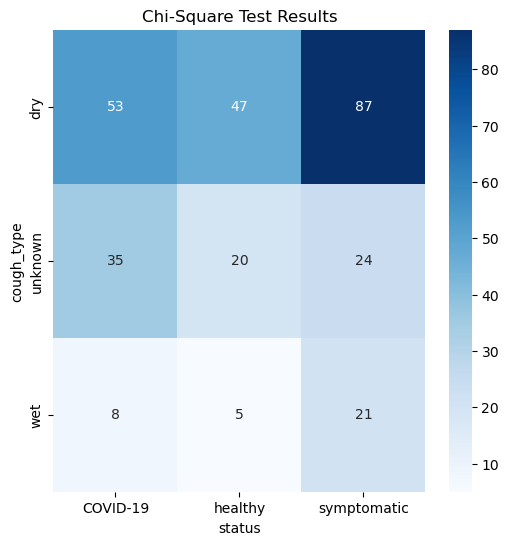

In [26]:
import seaborn as sns
fig = plt.figure(figsize=(6,6))
sns.heatmap(ct_table_ind, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

In [10]:
import sweetviz as sv
report = sv.analyze(gender_status_df)

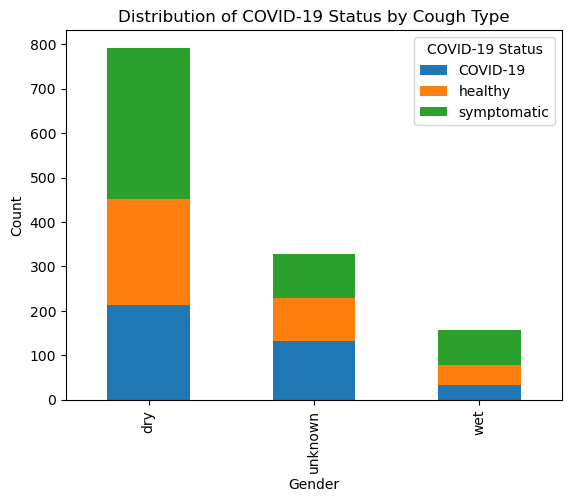

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
contingency_table = pd.crosstab(ct_status_df['cough_type'], ct_status_df['status'])
contingency_table.plot(kind='bar', stacked=True)
plt.title('Distribution of COVID-19 Status by Cough Type')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='COVID-19 Status')
plt.show()
